# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 1.6 Implement the solution for $\mathbf{w}$.

In [4]:
def compute_w(x1, y1, x2, y2):
    assert x1 != x2, "x1 and x2 must be different to avoid singular matrix."
    X = np.array([[1, x1], [1, x2]])
    y = np.array([y1, y2])

    w = np.linalg.inv(X) @ y # No need for pseudo-inverse since X is 2x2 and invertible since x1 != x2
    return w

compute_w(2, 3, 3, 4)

array([1., 1.])

## 2.1 Plot $y = -3x^2 + 72x + 70$.

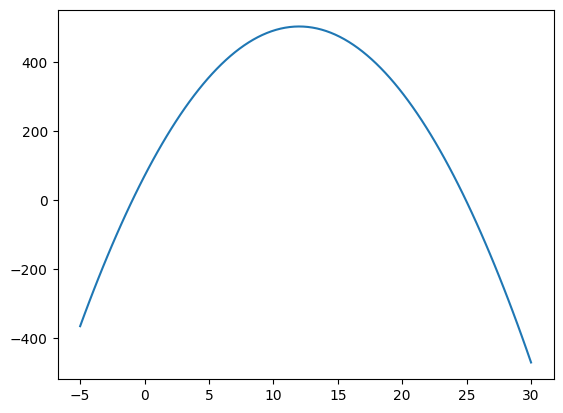

In [8]:
xs = np.linspace(-5, 30, 100)
ys = -3 * xs**2 + 72 * xs + 70
plt.plot(xs, ys)

## 2.3 Plot $f(x_1, x_2)$.

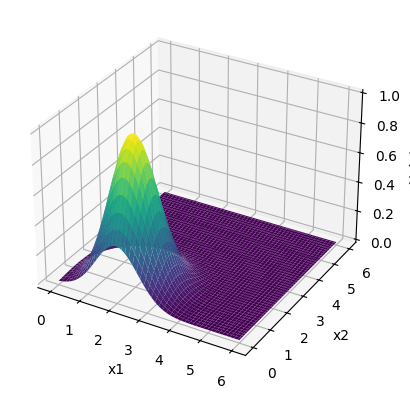

In [ ]:
x1_range = np.linspace(0, 6, 100)
x2_range = np.linspace(0, 6, 100)

X1, X2 = np.meshgrid(x1_range, x2_range) # From ChatGPT: Creates a grid of (x1, x2) points

Z = np.exp(-(X1 - 2)**2 - (X2 - 1)**2)

# 4. Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Height')

plt.show()

## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

Mean size: 119.96031084423196, Mean weight: 3.929099937912143


<Axes: ylabel='Count'>

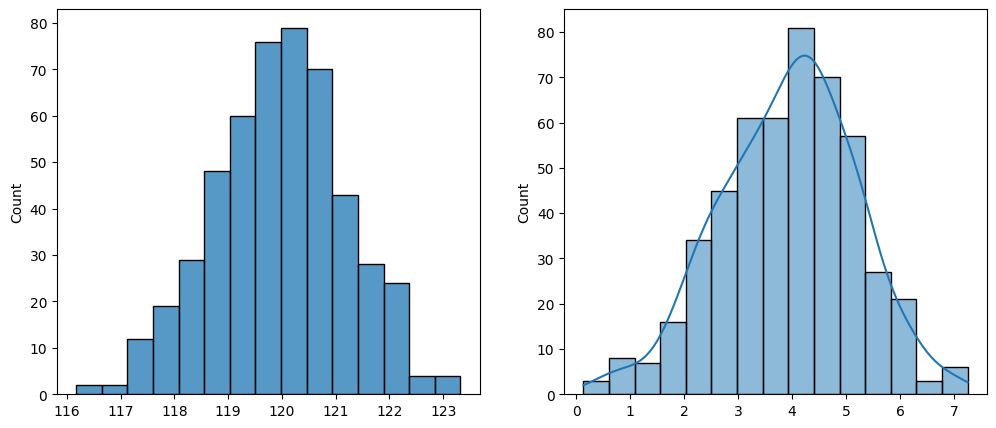

In [32]:
mu = np.array([120, 4])
sigma = np.array([[1.5, 1], [1, 1.5]])
F = mvn(mean=mu, cov=sigma)

samples = F.rvs(size=500)

mean_s = np.mean(samples[:, 0])
mean_w = np.mean(samples[:, 1])

print(f"Mean size: {mean_s}, Mean weight: {mean_w}")


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(samples[:, 0], bins=15, ax=axs[0])
sns.histplot(samples[:, 1], bins=15, kde=True, ax=axs[1])

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

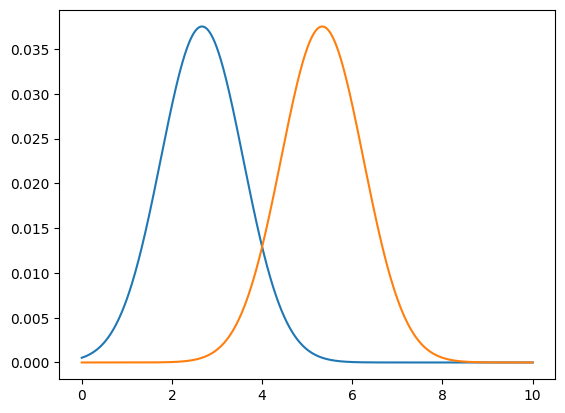

In [35]:
ws = np.linspace(0, 10, 1001)
s_1 = 118
s_2 = 122

pdf_s1 = F.pdf(np.column_stack((np.full_like(ws, s_1), ws)))
pdf_s2 = F.pdf(np.column_stack((np.full_like(ws, s_2), ws)))

plt.plot(ws, pdf_s1)
plt.plot(ws, pdf_s2)

## 3.5(a) Function to simulate draws from $T^{*}$.

In [ ]:
def single_sample():
    lamb = 24 * 3 # Sum of iid Poisson RVs is Poisson with rate equal to the sum of the individual rates
    N = np.random.poisson(lamb)

    mu = np.array([120, 4])
    sigma = np.array([[1.5, 1], [1, 1.5]])
    F = mvn(mean=mu, cov=sigma)
    samples = F.rvs(size=N)

    noise = np.random.normal(0, np.sqrt(5), N)

    T = 60 + 0.6 * samples[:, 1] + 0.2 * samples[:, 0] + noise
    return np.sum(T)

single_sample()

np.float64(4663.123118351156)

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [111]:
num_experiments = 1000
results = [single_sample() for _ in range(num_experiments)]

mean_result = np.mean(results)
stddev_result = np.std(results)
print(f"Mean total time: {mean_result}, Stddev total time: {stddev_result}")

Mean total time: 6201.004537222166, Stddev total time: 726.951036868964


# 4.1: Examining the Data

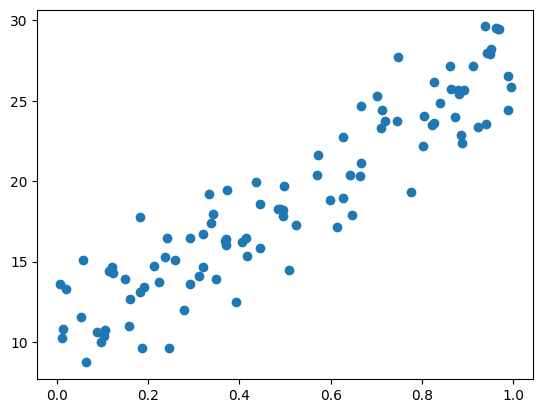

In [100]:
# Steve's solution
data = pd.read_csv("data/points.csv").values
x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)

## 4.2: Adding the Intercept/Bias Term

In [101]:
# Steve's solution
intercept = np.ones(x.shape[0])

print(intercept.shape)
print(x.shape)

intercept = intercept.reshape(-1, 1) # reshape to be a column vector
x = x.reshape(-1, 1) # reshape to be a column vector
print(intercept.shape)
print(x.shape)

X = np.hstack([intercept, x]) # horizontally stack the ones and x coordinates next to each other
print(X.shape)
print(X)

print(y.shape)

(100,)
(100,)
(100, 1)
(100, 1)
(100, 2)
[[1.         0.52402311]
 [1.         0.11408956]
 [1.         0.57056722]
 [1.         0.40583553]
 [1.         0.18213411]
 [1.         0.15673626]
 [1.         0.31911967]
 [1.         0.33218758]
 [1.         0.71337505]
 [1.         0.70222157]
 [1.         0.37181645]
 [1.         0.83898616]
 [1.         0.95092182]
 [1.         0.24063248]
 [1.         0.87227491]
 [1.         0.48405363]
 [1.         0.96326291]
 [1.         0.41329155]
 [1.         0.29050653]
 [1.         0.33806885]
 [1.         0.62794335]
 [1.         0.06392082]
 [1.         0.01328338]
 [1.         0.41653623]
 [1.         0.98828734]
 [1.         0.71026282]
 [1.         0.4899149 ]
 [1.         0.64339465]
 [1.         0.27717753]
 [1.         0.4364856 ]
 [1.         0.02033505]
 [1.         0.74491859]
 [1.         0.82163488]
 [1.         0.23553842]
 [1.         0.87941561]
 [1.         0.91188025]
 [1.         0.05593446]
 [1.         0.49619701]
 [1.     

## 4.4: Implementing the LinearRegression Class

In [108]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w

FileNotFoundError: [Errno 2] No such file or directory: 'img_output/hw0_p4_4.png'

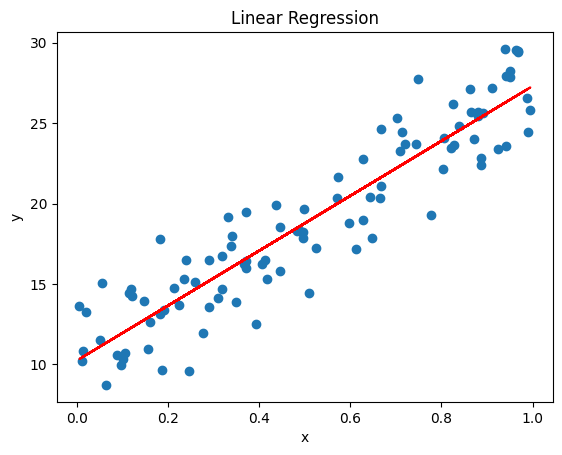

In [109]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [110]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)

mse_vectorized = np.mean((y - y_pred) ** 2)
print(mse_vectorized)

4.439331220193986
4.439331220193985
